In [16]:
import praw
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Log In to App: 
reddit = praw.Reddit(client_id='eKxH9xBDt9S2llZPa1GSQQ', client_secret='B_0BVQyNGtKJ_rEjdJPTP6E7vVr9Bw', user_agent='BneayBot')

In [4]:
subs = reddit.subreddit('Python').hot(limit=100)

for submission in subs:
    print(submission.title)

Sunday Daily Thread: What's everyone working on this week?
Thursday Daily Thread: Python Careers, Courses, and Furthering Education!
SpotiFile : Music scraping made easy
Mypy 1.2 Released
Polars for initial data analysis, Polars for production
Pip, Private CAs, and Root Only vs Bundle Cert Specification
PyArrow Strings in Dask DataFrames!!
Announcing sequence_align: an open-source Python + Rust toolkit for efficient sequence alignment
NetworkX 3.1 released
Algebraic Data Types in (typed) Python
Is E501 (79 character lines) still relevant?
Is geopandas right for this use case or should I be looking at something else? Looking to create, manipulate, and measure closed polylines with arc segments across a shared geometric space.
Building and Training Vision Transformer from Scratch
Looking for Tips / Educational Newsletter for Intermediate to Advanced Python
Showcasing a 2D scrolling shooter game
2,000 free sign ups available for the "Automate the Boring Stuff with Python" online course. (

In [5]:
subs = reddit.subreddit('python').top('year')

for submission in subs:
    print(submission.title,',',submission.num_comments,',',submission.score)

C:\Users\surface\AppData\Local\Temp\ipykernel_20876\1796413492.py:1: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  subs = reddit.subreddit('python').top('year')


The Python Mega Course is now free on Udemy , 198 , 3441
at 44, I am struggling on Python for two months now but I keep at it. 2 hours a night, after the kids sleep, I work on it and will eventually be able to use it to get a better job, a better life for them. , 296 , 2341
I think the CTX package on PyPI has been hacked! , 288 , 1825
Spent Months Writing A Web Dev Course For A Platform, But It Got Canceled Midway. Publishing It Free For The Community. , 93 , 1516
Today I’m releasing PyBoy v1.5.0! A Game Boy emulator written in Python, focused on scripting, AI and learning , 32 , 1493
How I deploy my bootstrapped Python webapp with 150k monthly users , 172 , 1482
Detailed Python developer roadmap , 65 , 1451
We are the developers behind pandas, currently preparing for the 2.0 release :) AMA , 375 , 1431
A free 'learning map' I found to learn Python. It puts free resources together into a skill tree for planning and tracking learning , 68 , 1425
Is it just me or did the creators of the 

In [6]:
import pandas as pd
pd.set_option('max_colwidth', None)
df = []

subreddit = reddit.subreddit('python')

for post in subreddit.hot(limit=1000):
    df.append([post.title, post.score, post.url, post.num_comments, post.selftext])

df = pd.DataFrame(df,columns=['title', 'score', 'url', 'num_comments', 'body'])
df

,title,score,url,num_comments,body
0,Sunday Daily Thread: What's everyone working on this week?,9,https://www.reddit.com/r/Python/comments/1293hsw/sunday_daily_thread_whats_everyone_working_on/,28,"Tell /r/python what you're working on this week! You can be bragging, grousing, sharing your passion, or explaining your pain. Talk about your current project or your pet project; whatever you want to share."
1,"Thursday Daily Thread: Python Careers, Courses, and Furthering Education!",1,https://www.reddit.com/r/Python/comments/12d2l9a/thursday_daily_thread_python_careers_courses_and/,0,"Discussion of using Python in a professional environment, getting jobs in Python as well as ask questions about courses to further your python education!\n\n**This thread is not for recruitment, please see** r/PythonJobs **or the thread in the sidebar for that.**"
2,SpotiFile : Music scraping made easy,180,https://www.reddit.com/r/Python/comments/12dfdq1/spotifile_music_scraping_made_easy/,30,"\n\nI made a neat tool to scrape songs (with GUI).\n\n[GitHub Link](https://github.com/Michael-K-Stein/SpotiFile)\n\nAll you need to do is install the dependencies (""pip install -r ./requirements""), and then ""python [main.py](https://main.py/)"". It's that easy!\n\n##This tool is mainly aimed at developers looking to create datasets to train ML models.\n\nSpotiFile will open a GUI which lets you enter a playlist, album, artist, or user profile link and download all the relevant songs. This will also download all the metadata of the song, including the time-synced lyrics!\n\nIf you use the tool, please give the repo a star :)\nAnd please tell me how to improve the code quality!\n\nEnjoy!"
3,Mypy 1.2 Released,43,https://mypy-lang.blogspot.com/2023/04/mypy-12-released.html,0,
4,"Polars for initial data analysis, Polars for production",21,https://pythonspeed.com/articles/polars-exploratory-data-analysis-vs-production/,2,
...,...,...,...,...,...
516,Lib for dynamically generating classes from json or dict on runtime,0,https://www.reddit.com/r/Python/comments/11ra0e5/lib_for_dynamically_generating_classes_from_json/,0,"I wrote a lib for creating dynamically classes or objects from python dicts or json on runtime.\n\nwith this lib you are be able to let your application write his entity him self.\n\nI using it for generating classes out of json request in flask for sqlalchemy or mongoengine.\n\nit works with init on class level and also with init on attributes.\n\nit works with builtin types and also own objects and types.\n\n[https://pypi.org/project/pydict2class/0.0.1/](https://pypi.org/project/pydict2class/0.0.1/)\n\n[https://github.com/dierk-bentpiening/PyDict2Class](https://github.com/dierk-bentpiening/PyDict2Class)\n\n# PyDict2Class\n\nDynamic create classes from dict or json like you would develop them yourself.\n\n## Introduction\n\nThis tool makes it possible to generate a Python class with attributes from a dict or a JSON, or to create an object with the corresponding assigned values. The data type of the value of the dict or JSON is recognized and automatically initialized with the appropriate builtins data types. Non Python standard types or methods can also be included by adding them to the type attribute, this can also override the internal data types.\n\ni use this tool to dynamically create mongoengine data classes with the appropriate attributes. Actual i am implement the Functionality to create SQLAlchemy Data Model classes.\n\n## Usage\n\ninstall the library from source or over pip. import package and inherit Class object. e builtins data types. Non Python standard types or methods can also be inc\n\n from pydict2class import Dict2Class dict2class = Dict2Class() \n\nDefine the Dictionary you want to generate a class from.\n\n mydict = {""integer"": 1, ""string"": ""my string"", ""boolean"": True, ""list"": [1, 2, 3]} \n\nNow you have to decide whether you want to generate only the class or if you want to generate the class and instantiate it wit

In [7]:
headlines=set()
for submission in reddit.subreddit('Python').hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

504


In [8]:
df = pd.DataFrame(headlines)
df.head()

,0
0,"Introducing DataFrame QuickView: A Python package for easy DataFrame visualization, co-created with GPT-4! Seeking contributors 🚀"
1,Keystroke Dynamics -- Predicting the User — Lambda App
2,Be confident in your requirements list with bonded
3,Is E501 (79 character lines) still relevant?
4,yoyo-migrations performance feedback


In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\surface\AppData\Roaming\nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia=SIA()
results=[]

for line in headlines:
    pol_score=sia.polarity_scores(line)
    pol_score['headlines'] = line
    results.append(pol_score)

pprint(results[:3], width=100)



[{'compound': 0.4926,
  'headlines': 'Introducing DataFrame QuickView: A Python package for easy DataFrame '
               'visualization, co-created with GPT-4! Seeking contributors 🚀',
  'neg': 0.0,
  'neu': 0.803,
  'pos': 0.197},
 {'compound': 0.2732,
  'headlines': 'Keystroke Dynamics -- Predicting the User — Lambda App',
  'neg': 0.0,
  'neu': 0.769,
  'pos': 0.231},
 {'compound': 0.4939,
  'headlines': 'Be confident in your requirements list with bonded',
  'neg': 0.0,
  'neu': 0.686,
  'pos': 0.314}]


In [18]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headlines
0,0.0,0.803,0.197,0.4926,"Introducing DataFrame QuickView: A Python package for easy DataFrame visualization, co-created with GPT-4! Seeking contributors 🚀"
1,0.0,0.769,0.231,0.2732,Keystroke Dynamics -- Predicting the User — Lambda App
2,0.0,0.686,0.314,0.4939,Be confident in your requirements list with bonded
3,0.0,1.000,0.000,0.0000,Is E501 (79 character lines) still relevant?
4,0.0,1.000,0.000,0.0000,yoyo-migrations performance feedback


In [25]:
df['label']=0
df.loc[df['compound']>0.2, 'label'] =1
df.loc[df['compound']<-0.2, 'label'] =-1

df.head()

,neg,neu,pos,compound,headlines,label
0,0.0,0.803,0.197,0.4926,"Introducing DataFrame QuickView: A Python package for easy DataFrame visualization, co-created with GPT-4! Seeking contributors 🚀",1
1,0.0,0.769,0.231,0.2732,Keystroke Dynamics -- Predicting the User — Lambda App,1
2,0.0,0.686,0.314,0.4939,Be confident in your requirements list with bonded,1
3,0.0,1.000,0.000,0.0000,Is E501 (79 character lines) still relevant?,0
4,0.0,1.000,0.000,0.0000,yoyo-migrations performance feedback,0


In [26]:
df2=df[['headlines','label']]

In [29]:
df2.to_csv('headlines_labels.csv', encoding='utf-8',index=False)

In [30]:
df.label.value_counts()

 0    328
 1    147
-1     29
Name: label, dtype: int64

In [31]:
df2.label.value_counts(normalize=True)*100

 0    65.079365
 1    29.166667
-1     5.753968
Name: label, dtype: float64

In [34]:
print("Positive headlines:\n")
pprint(list(df[df['label']==1].headlines)[:5], width=200)

print("Negative headlines:\n")
pprint(list(df[df['label']==-1].headlines)[:5], width=200)


Positive headlines:

['Introducing DataFrame QuickView: A Python package for easy DataFrame visualization, co-created with GPT-4! Seeking contributors 🚀',
 'Keystroke Dynamics -- Predicting the User — Lambda App',
 'Be confident in your requirements list with bonded',
 'New release of FastKafka supporting Redpanda',
 'Is Python 3.rd party libraries are legit safe to pip install?']
Negative headlines:

['Auto Login and Auto Prompt for non api chat gpt. No cloudfare so far!!',
 'Analysing the emotion timeline of the Enron scandal through their internal emails in Python',
 'Alarm clock made with Python & Kivy',
 'Text Parsing: Now You Have Three Problems (David Beazley)',
 'The SC has decided to reject PEP 582 (Python local packages directory) , at least in its current form.']


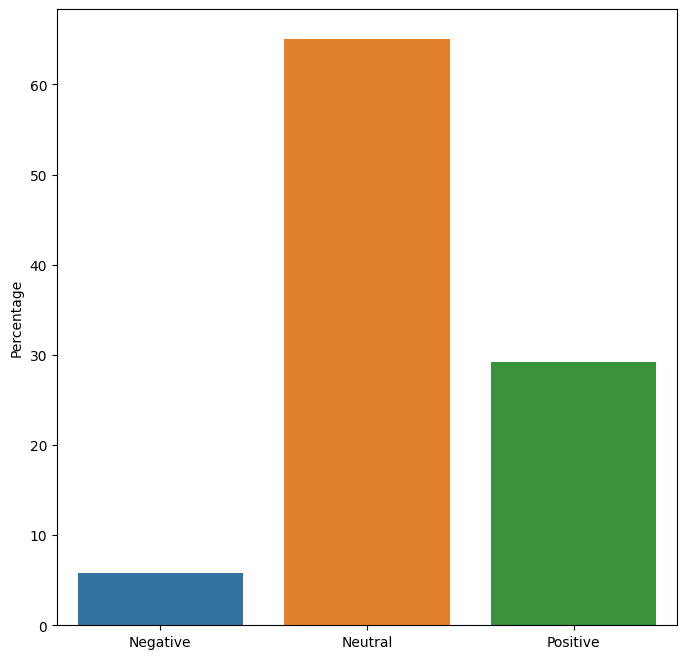

In [38]:
fig , ax = plt.subplots(figsize=(8,8))
counts=df.label.value_counts(normalize=True)*100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral','Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch


tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-large")
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-large")

# Let's chat for 5 lines
for step in range(5):
    # encode the new user input, add the eos_token and return a tensor in Pytorch
    new_user_input_ids = tokenizer.encode(input(">> User:") + tokenizer.eos_token, return_tensors='pt')

    # append the new user input tokens to the chat history
    bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids], dim=-1) if step > 0 else new_user_input_ids

    # generated a response while limiting the total chat history to 1000 tokens, 
    chat_history_ids = model.generate(bot_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

    # pretty print last ouput tokens from bot
    print("DialoGPT: {}".format(tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)))

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


DialoGPT: Hiya


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


DialoGPT: I'm doing great, thank you for asking.


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


DialoGPT: I have been trained on the date of the day you asked me.


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


DialoGPT: The data I have been trained on.


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


DialoGPT: I have been trained on the data you have been trained on.
